# Assignment 2 by Kundyz Onlabek

# Section 1. Dataset acquaintance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)

In [3]:
df.sample(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
2095765423,"Doozy Watch - ""Always Be Connected"" An Innovat...",Product Design,Design,USD,2013-11-23,50000.0,2013-10-23 06:43:20,38029.0,canceled,353,US,38029.0,38029.0,50000.0
1307226880,Invitation to the Dances: Central Florida Comp...,Classical Music,Music,USD,2016-09-01,5000.0,2016-08-02 05:29:32,5151.0,successful,61,US,740.0,5151.0,5000.0
29126932,The Inventions of Frances Hugle,Nonfiction,Publishing,USD,2012-01-31,2500.0,2011-12-02 18:46:26,606.0,failed,20,US,606.0,606.0,2500.0
2004527136,THE STEAK OUT,Food,Food,USD,2017-12-29,13000.0,2017-11-29 16:03:49,0.0,canceled,0,US,0.0,0.0,13000.0
1054188919,Alea Tools: Magnetic Status Markers Color Boost,Tabletop Games,Games,USD,2013-06-28,750.0,2013-05-28 20:03:39,29196.0,successful,309,US,29196.0,29196.0,750.0


In [4]:
df.shape

(378661, 14)

In [5]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [6]:
# Q1.1 How many NaN values are there in the dataset?

In [7]:
df.isnull().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
# 3801

In [9]:
df.dropna(how='any', inplace=True)

In [10]:
# Let us simplify the task a little bit: we are aiming to predict either project fails or not. Thus 'success' projects will be encoded as 1, with state ['failed', 'canceled'] as 0 and we remove the rows with any other state.

In [11]:
df['state'][df['state']=='successful'] = 1
df['state'][(df['state']=='failed') | (df['state']=='canceled')] = 0
df = df[(df['state']==1) | (df['state']==0)]

df['state'] = df['state'].astype(int)

<ipython-input-11-0ff331230689>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'][df['state']=='successful'] = 1
<ipython-input-11-0ff331230689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'][(df['state']=='failed') | (df['state']=='canceled')] = 0


In [12]:
# Q1.2 How many '1' values are in resulting dataset (in state column)?
df['state'].value_counts()

0    236368
1    133851
Name: state, dtype: int64

In [13]:
# 133851

In [14]:
# Q1.3 What is a name of a project attracted the biggest pay check? (on average). Use column usd_pledged_real to judge. If there are multiple projects, choose any single one.

In [15]:
df['pay_check'] = df['usd_pledged_real']/df['backers']
df['pay_check'].replace(np.inf, np.nan, inplace=True)
df.dropna(inplace=True)

df[df['pay_check']==df['pay_check'].max()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pay_check
ID,,,,,,,,,,,,,,,
1459482568,Patented (9 seasons) food enhancer,Vegan,Food,USD,2016-02-22,150000.0,2016-01-23 00:02:15,10000.0,0,1,US,10000.0,10000.0,150000.0,10000.0
1767293256,KIRISUTOS PACHYDERM,Animation,Film & Video,USD,2015-05-27,1000000.0,2015-03-28 03:13:34,10000.0,0,1,US,10000.0,10000.0,1000000.0,10000.0
1974395971,21st CENTURY MEDICAL PRACTICE SYSTEM THAT CHAN...,Makerspaces,Technology,USD,2017-05-30,250000.0,2017-03-31 17:25:35,10000.0,0,1,US,0.0,10000.0,250000.0,10000.0
2024799289,The Commoner Princess,Mobile Games,Games,USD,2016-06-03,10000.0,2016-05-04 10:10:33,10000.0,1,1,US,10000.0,10000.0,10000.0,10000.0
281085395,"""SUNBURN"" - starring Michael Madsen, indie act...",Narrative Film,Film & Video,USD,2011-10-02,250000.0,2011-08-03 20:09:12,10000.0,0,1,US,10000.0,10000.0,250000.0,10000.0
472233286,"Hollow Earth Project, Journey to the center of...",Documentary,Film & Video,USD,2016-11-25,1000000.0,2016-09-26 18:36:53,10000.0,0,1,US,10000.0,10000.0,1000000.0,10000.0
642968820,Nobody: The Movie (Canceled),Film & Video,Film & Video,USD,2015-04-22,60000.0,2015-02-21 23:07:08,10000.0,0,1,US,10000.0,10000.0,60000.0,10000.0
889803741,Post Traumatic Stress (PTSD) Affects Us All,Documentary,Film & Video,USD,2013-09-14,1500000.0,2013-08-15 00:07:18,10000.0,0,1,US,10000.0,10000.0,1500000.0,10000.0
912587650,The Hare On The Chair - An Easter Legend,Children's Books,Publishing,USD,2015-05-03,48000.0,2015-04-03 10:46:03,10000.0,0,1,US,10000.0,10000.0,48000.0,10000.0


In [16]:
df.loc[1767293256, 'name']

'KIRISUTOS PACHYDERM'

In [17]:
df.drop('pay_check', axis=1,inplace=True)

In [18]:
# Q1.4 What is the most successful main category (in terms of success percentage)?

In [19]:
total_c = df['main_category'].value_counts()
success_c = df[df['state']==1]['main_category'].value_counts()
per_c = success_c/total_c*100
round(per_c.sort_values(ascending=False).head(1), 3)

Dance    67.378
Name: main_category, dtype: float64

In [20]:
# Q1.5 Define the category with highest goal per project. How many projects belong to it? (note: we use category here, not main_category)

In [21]:
round(df.groupby('category')['goal'].mean().sort_values(ascending=False).head(1), 3)

category
Movie Theaters    1363258.167
Name: goal, dtype: float64

In [22]:
len(df[df['category']=='Movie Theaters'])

162

In [23]:
# Q1.6 What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

In [24]:
round(df.groupby('category')['usd_pledged_real'].sum().sort_values(ascending=False).head(1), 1)

category
Product Design    628437750.5
Name: usd_pledged_real, dtype: float64

In [25]:
# Q1.7 Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [26]:
ndf = df.select_dtypes(include=[np.number])
odf = df.select_dtypes(exclude=[np.number])
len(odf.dtypes)

7

In [27]:
# Q1.8 Let's do a bit of feature engineering. Let's create column 'pledge2goal' which define as ratio of usd_pledged_real to goal. How many outliers are there? 
# (We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [28]:
ndf['pledge2goal'] = ndf['usd_pledged_real']/ndf['goal']

q25 = ndf['pledge2goal'].quantile(0.25)
q75 = ndf['pledge2goal'].quantile(0.75)
iqr = q75-q25
x = q25-1.5*iqr
y = q75+1.5*iqr
cond = (ndf['pledge2goal'] >= x) & (ndf['pledge2goal'] <= y)

len(ndf[cond == False])

<ipython-input-28-3bd9475837a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['pledge2goal'] = ndf['usd_pledged_real']/ndf['goal']


17692

In [29]:
# Q1.9 Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer.

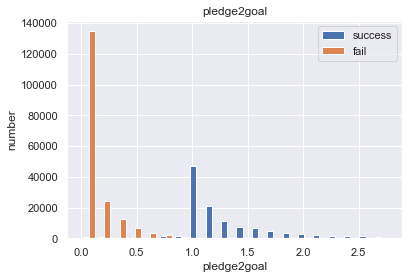

In [30]:
plt.hist([ndf[cond]['pledge2goal'][ndf[cond]['state']==1], ndf[cond]['pledge2goal'][ndf[cond]['state']==0]], bins = 20, label=['success', 'fail'])
plt.legend()
plt.title('pledge2goal')
plt.ylabel('number')
plt.xlabel('pledge2goal');

In [31]:
# A

In [32]:
# Q1.10 Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer.

In [33]:
# For fail distribution:0.1, for success distribution:1.0.

In [34]:
# Q1.11 Compute Pearson correlation coefficient between the pledge2real and target variable.

In [35]:
from scipy.stats import pearsonr
corr, _ = pearsonr(ndf[cond]['pledge2goal'], ndf[cond]['state'])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: 0.889


In [36]:
# Q1.12 Visualize dependancy of numerical data with success. What can you say about it?

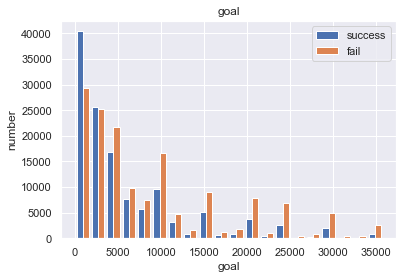

In [37]:
q25 = ndf['goal'].quantile(0.25)
q75 = ndf['goal'].quantile(0.75)
iqr = q75-q25
x = q25-1.5*iqr
y = q75+1.5*iqr
cond = (ndf['goal'] >= x) & (ndf['goal'] <= y)

plt.hist([ndf[cond]['goal'][ndf[cond]['state']==1], ndf[cond]['goal'][ndf[cond]['state']==0]], bins = 20, label=['success', 'fail'])
plt.legend()
plt.title('goal')
plt.ylabel('number')
plt.xlabel('goal');

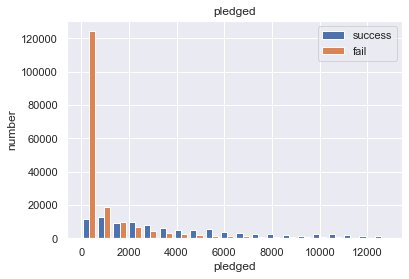

In [38]:
q25 = ndf['pledged'].quantile(0.25)
q75 = ndf['pledged'].quantile(0.75)
iqr = q75-q25
x = q25-1.5*iqr
y = q75+1.5*iqr
cond = (ndf['pledged'] >= x) & (ndf['pledged'] <= y)

plt.hist([ndf[cond]['pledged'][ndf[cond]['state']==1], ndf[cond]['pledged'][ndf[cond]['state']==0]], bins = 20, label=['success', 'fail'])
plt.legend()
plt.title('pledged')
plt.ylabel('number')
plt.xlabel('pledged');

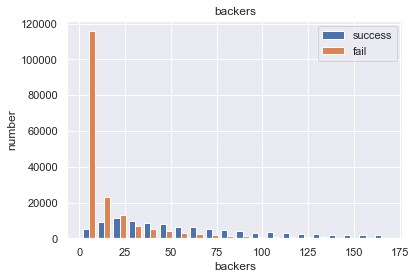

In [39]:
q25 = ndf['backers'].quantile(0.25)
q75 = ndf['backers'].quantile(0.75)
iqr = q75-q25
x = q25-1.5*iqr
y = q75+1.5*iqr
cond = (ndf['backers'] >= x) & (ndf['backers'] <= y)

plt.hist([ndf[cond]['backers'][ndf[cond]['state']==1], ndf[cond]['backers'][ndf[cond]['state']==0]], bins = 20, label=['success', 'fail'])
plt.legend()
plt.title('backers')
plt.ylabel('number')
plt.xlabel('backers');

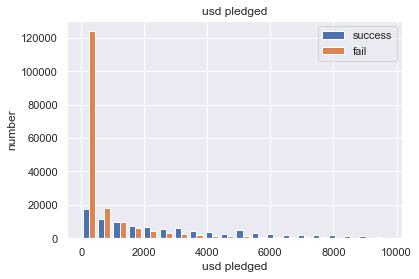

In [40]:
q25 = ndf['usd pledged'].quantile(0.25)
q75 = ndf['usd pledged'].quantile(0.75)
iqr = q75-q25
x = q25-1.5*iqr
y = q75+1.5*iqr
cond = (ndf['usd pledged'] >= x) & (ndf['usd pledged'] <= y)

plt.hist([ndf[cond]['usd pledged'][ndf[cond]['state']==1], ndf[cond]['usd pledged'][ndf[cond]['state']==0]], bins = 20, label=['success', 'fail'])
plt.legend()
plt.title('usd pledged')
plt.ylabel('number')
plt.xlabel('usd pledged');

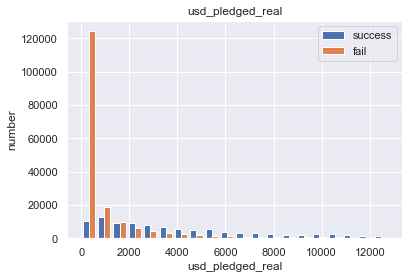

In [41]:
q25 = ndf['usd_pledged_real'].quantile(0.25)
q75 = ndf['usd_pledged_real'].quantile(0.75)
iqr = q75-q25
x = q25-1.5*iqr
y = q75+1.5*iqr
cond = (ndf['usd_pledged_real'] >= x) & (ndf['usd_pledged_real'] <= y)

plt.hist([ndf[cond]['usd_pledged_real'][ndf[cond]['state']==1], ndf[cond]['usd_pledged_real'][ndf[cond]['state']==0]], bins = 20, label=['success', 'fail'])
plt.legend()
plt.title('usd_pledged_real')
plt.ylabel('number')
plt.xlabel('usd_pledged_real');

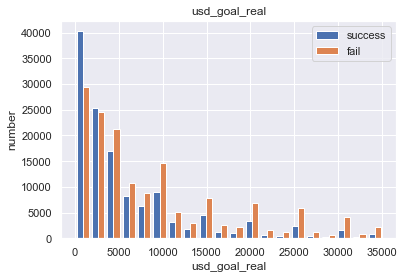

In [42]:
q25 = ndf['usd_goal_real'].quantile(0.25)
q75 = ndf['usd_goal_real'].quantile(0.75)
iqr = q75-q25
x = q25-1.5*iqr
y = q75+1.5*iqr
cond = (ndf['usd_goal_real'] >= x) & (ndf['usd_goal_real'] <= y)

plt.hist([ndf[cond]['usd_goal_real'][ndf[cond]['state']==1], ndf[cond]['usd_goal_real'][ndf[cond]['state']==0]], bins = 20, label=['success', 'fail'])
plt.legend()
plt.title('usd_goal_real')
plt.ylabel('number')
plt.xlabel('usd_goal_real');

In [43]:
# Observation: it is hard to see clear correlation between each category and success.

# Section 2. Feature generation

In [44]:
# Q2.1 Create a year column that would hold the year. How many projects were in year 2012?

In [45]:
df['launched'] = pd.to_datetime(df['launched']).dt.normalize()
df['year'] = pd.DatetimeIndex(df['launched']).year

len(df[df['year']==2012])

37276

In [46]:
# Q2.2 Make a column 'duration_days' with number of full days from launch to deadline. What is median value for this column?

In [47]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration_days'] = pd.DatetimeIndex(df['deadline']) - pd.DatetimeIndex(df['launched'])
df['duration_days'] = df['duration_days'].astype('timedelta64[D]').astype(int)

df['duration_days'].median()

30.0

In [48]:
# Q2.4 Make column 'region' out of column country (america, europe, asia, oceania(including australiza/nz)). Where is the region with the worst conversion rate (percentage of successful projects)?

In [49]:
df['region'] = df['country'].replace({'US':'America', 'GB':'Europe', 'CA':'America', 'AU':'Oceania', 'DE':'Europe', 'FR':'Europe', 'NL':'Europe', 'IT':'Europe', 'ES':'Europe', 'SE':'Europe', 'MX':'America', 'NZ':'Oceania', 'DK':'Europe', 'IE':'Europe', 'CH':'Europe', 'NO':'Europe', 'HK':'Asia', 'BE':'Europe', 'AT':'Europe', 'SG':'Asia', 'LU':'Europe', 'JP':'Asia'})

total_r = df['region'].value_counts()
success_r = df[df['state']==1]['region'].value_counts()
per_r = success_r/total_r*100
round(per_r.sort_values().head(1), 3)

Oceania    32.427
Name: region, dtype: float64

In [50]:
# Q2.5 For each main_category leave only the three most popular category and replace other with "other". What is the most frequent subcategory for design?

In [51]:
cdf = df.groupby('main_category')['category'].value_counts().reset_index(name='count')
cdf2 = cdf.groupby('main_category')[['category', 'count']].apply(pd.DataFrame.nlargest, n=3, columns=['count'])
cdf2.reset_index().drop('level_1',axis=1)
cdf3 = cdf2['category'].values.tolist()
df['category'] = df['category'].where(df['category'].isin(cdf3), other='other')

df[df['main_category']=='Design']['category'].value_counts().sort_values(ascending=False).head(1)

Product Design    20863
Name: category, dtype: int64

In [52]:
# Q2.6 Create the columns "name_length" with length of the name. What is the biggets length?

In [53]:
df['name_length'] = df['name'].str.len()
df['name_length'].max()

96

# Section 3. Preprocessing

In [54]:
# Q3.1 Drop the leaking columns. Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them.

In [55]:
df1 = df.drop(columns = ['pledged', 'usd pledged', 'usd_pledged_real', 'backers'], axis=1)

In [56]:
df = df.drop(columns = ['pledged', 'usd pledged', 'usd_pledged_real', 'backers'], axis=1)

In [57]:
# Q3.2 Deal with the categorical features. Lets drop some more columns for now (name, deadline, launched, country, usd_goal_real). Note: you can re-use these columns in the Q5 section. Preprocess the rest of categorical columns. How many columns do you have now?

In [58]:
df.drop(columns = ['name', 'deadline', 'launched', 'country', 'usd_goal_real'], axis=1, inplace=True)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(df[['category', 'main_category', 'currency', 'year', 'region']]))
ohe.categories_

category_cols = [f'category_{cat}' for cat in ohe.categories_[0]]
main_category_cols = [f'main_category_{cat}' for cat in ohe.categories_[1]]
currency_cols = [f'currency_{cat}' for cat in ohe.categories_[2]]
year_cols = [f'year_{cat}' for cat in ohe.categories_[3]]
region_cols = [f'region_{cat}' for cat in ohe.categories_[4]]

dummy_cols_names = [*category_cols, *main_category_cols, *currency_cols, *year_cols, *region_cols]
encoded_features.columns = dummy_cols_names

df.drop(['category', 'main_category', 'currency', 'year', 'region'], axis=1, inplace=True)
encoded_features.index = df.index
df = pd.concat([df, encoded_features], axis=1)

len(df.columns)

93

In [59]:
# Q3.3 Split the dataset. Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

In [60]:
from sklearn.model_selection import train_test_split
X = df.drop(['state'], axis=1)
y = df['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.value_counts().sort_values().head(1).iloc[0]

107103

In [61]:
# Q3.4 Scale the numeric columns with standard scaler. What is max number in goal field after scaling?

In [62]:
from sklearn.preprocessing import StandardScaler
num_features = ['goal', 'duration_days', 'name_length']
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

round(X_train['goal'].max(), 3)

<ipython-input-62-884d5b8f19d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_features] = scaler.transform(X_train[num_features])
C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-62-884d5b8f19d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

109.168

# Section 4. Feature selection

In [63]:
# Q4.1 Estimate feature importance by Anova. What is the two most important features by anova with f classifier?

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=2)
selector.fit(X, y)
X_reduced = selector.transform(X)

In [65]:
for i in range(len(selector.scores_)):
    print('Feature %d: %f' % (i, selector.scores_[i]))

Feature 0: 217.823400
Feature 1: 5404.958576
Feature 2: 724.258647
Feature 3: 6.526452
Feature 4: 482.325783
Feature 5: 2104.861457
Feature 6: 139.476959
Feature 7: 10.768913
Feature 8: 427.607562
Feature 9: 245.230864
Feature 10: 201.051889
Feature 11: 144.606780
Feature 12: 744.203196
Feature 13: 28.546350
Feature 14: 0.374191
Feature 15: 132.691019
Feature 16: 336.376221
Feature 17: 388.624696
Feature 18: 6.431465
Feature 19: 284.250571
Feature 20: 185.170975
Feature 21: 0.336982
Feature 22: 161.202281
Feature 23: 59.878797
Feature 24: 272.642150
Feature 25: 1634.177512
Feature 26: 35.065087
Feature 27: 924.341012
Feature 28: 76.611301
Feature 29: 232.918999
Feature 30: 69.103985
Feature 31: 264.803794
Feature 32: 12.613822
Feature 33: 16.286296
Feature 34: 271.701786
Feature 35: 31.667394
Feature 36: 127.378994
Feature 37: 204.610003
Feature 38: 341.970819
Feature 39: 681.098644
Feature 40: 1605.312561
Feature 41: 0.556781
Feature 42: 1340.278404
Feature 43: 908.714160
Feature 44: 

In [66]:
X.columns

Index(['goal', 'duration_days', 'name_length', 'category_Accessories',
       'category_Apparel', 'category_Apps', 'category_Art',
       'category_Children's Books', 'category_Comic Books', 'category_Comics',
       'category_Crafts', 'category_DIY', 'category_Dance', 'category_Design',
       'category_Documentary', 'category_Drinks', 'category_Fashion',
       'category_Fiction', 'category_Film & Video', 'category_Food',
       'category_Games', 'category_Graphic Design', 'category_Graphic Novels',
       'category_Hardware', 'category_Illustration', 'category_Indie Rock',
       'category_Journalism', 'category_Music', 'category_Musical',
       'category_Nonfiction', 'category_People', 'category_Performances',
       'category_Photobooks', 'category_Photography', 'category_Plays',
       'category_Print', 'category_Product Design', 'category_Public Art',
       'category_Restaurants', 'category_Rock', 'category_Shorts',
       'category_Spaces', 'category_Tabletop Games', 'categor

In [67]:
print('duration_days, main_category_Music')

duration_days, main_category_Music


In [68]:
# Build a model with logistic regression. Use l2 penalty and search for optimal C in np.logspace(-2, 4, 7).

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
# Q4.2 What is an optimal C for l2 regularization?

In [71]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-2,4,7)}
lr_cv=GridSearchCV(lr,grid,cv=10)
lr_cv.fit(X_train,y_train)

C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])})

In [72]:
lr_cv.best_params_

{'C': 10000.0}

In [73]:
# Q4.3 What is the accuracy for this params?

In [74]:
lr = LogisticRegression(penalty='l2', C=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
round(accuracy_score(y_pred, y_test), 3)

C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.653

In [75]:
# Q4.4 What is the two most important features by logistic regression estimation?

In [76]:
coefs=lr.coef_[0]
top_two = np.argpartition(coefs, -2)[-2:]
top_two

array([63, 42], dtype=int64)

In [77]:
X.columns

Index(['goal', 'duration_days', 'name_length', 'category_Accessories',
       'category_Apparel', 'category_Apps', 'category_Art',
       'category_Children's Books', 'category_Comic Books', 'category_Comics',
       'category_Crafts', 'category_DIY', 'category_Dance', 'category_Design',
       'category_Documentary', 'category_Drinks', 'category_Fashion',
       'category_Fiction', 'category_Film & Video', 'category_Food',
       'category_Games', 'category_Graphic Design', 'category_Graphic Novels',
       'category_Hardware', 'category_Illustration', 'category_Indie Rock',
       'category_Journalism', 'category_Music', 'category_Musical',
       'category_Nonfiction', 'category_People', 'category_Performances',
       'category_Photobooks', 'category_Photography', 'category_Plays',
       'category_Print', 'category_Product Design', 'category_Public Art',
       'category_Restaurants', 'category_Rock', 'category_Shorts',
       'category_Spaces', 'category_Tabletop Games', 'categor

In [78]:
print('category_Tabletop Games, main_category_Theater')

category_Tabletop Games, main_category_Theater


In [79]:
# Q4.5 Build roc curve and calculate roc-auc score. What is the roc-auc score?

Text(0.5, 1.0, '2-class ROC curve: ROC AUC=0.700')

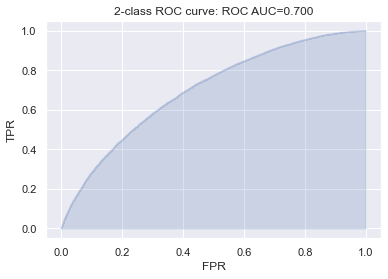

In [80]:
y_prob = lr.predict_proba(X_test)
y_prob = y_prob[:, 1]
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.step(fpr, tpr, color='b', alpha=0.2,
         where='post')
plt.fill_between(fpr, tpr, alpha=0.2, color='b')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('2-class ROC curve: ROC AUC={0:0.3f}'.format(
          roc_auc_score(y_test, y_prob)))

In [81]:
# Build a random forest model. Use random state 42, maximum depth from 2 to 15, and number of estimators in [10, 20, 50, 100, 200].

In [82]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42) 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [83]:
# Q4.6 What is an optimal depth and number of trees?

In [84]:
grid_f={'n_estimators':[10, 20, 50, 100, 200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
forest = RandomForestClassifier(random_state=42)
fr_cv=GridSearchCV(forest,grid_f,cv=5, n_jobs=-1, verbose=50)
fr_cv.fit(X_train,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.9min
[Paralle

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 19.1min
[Paralle

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'n_estimators': [10, 20, 50, 100, 200]},
             verbose=50)

In [85]:
fr_cv.best_params_

{'max_depth': 15, 'n_estimators': 200}

In [86]:
# Q4.7 What is the accuracy for this params?

In [87]:
forest = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42) 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
round(accuracy_score(y_test, y_pred), 3)

0.668

In [88]:
# Q4.8 Build precision-recall curve. What is the precision for recall 0.5?

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.521')

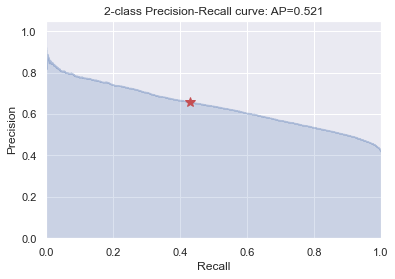

In [89]:
y_prob = forest.predict_proba(X_test)
y_prob = y_prob[:, 1]
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2, where='post')

plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.3f}'.format(
          average_precision_score(y_test, y_pred)))

In [90]:
pres_recall = pd.DataFrame({'precision' : precision, 'recall' : recall})
cond1 = pres_recall.recall >= 0.5
cond2 = pres_recall.recall < 0.5001
round(pres_recall[cond1 & cond2].precision, 3)

41118    0.638
41119    0.638
41120    0.638
41121    0.638
41122    0.638
41123    0.638
Name: precision, dtype: float64

In [91]:
# Q4.9 What is the two most important features by random forest?

<BarContainer object of 92 artists>

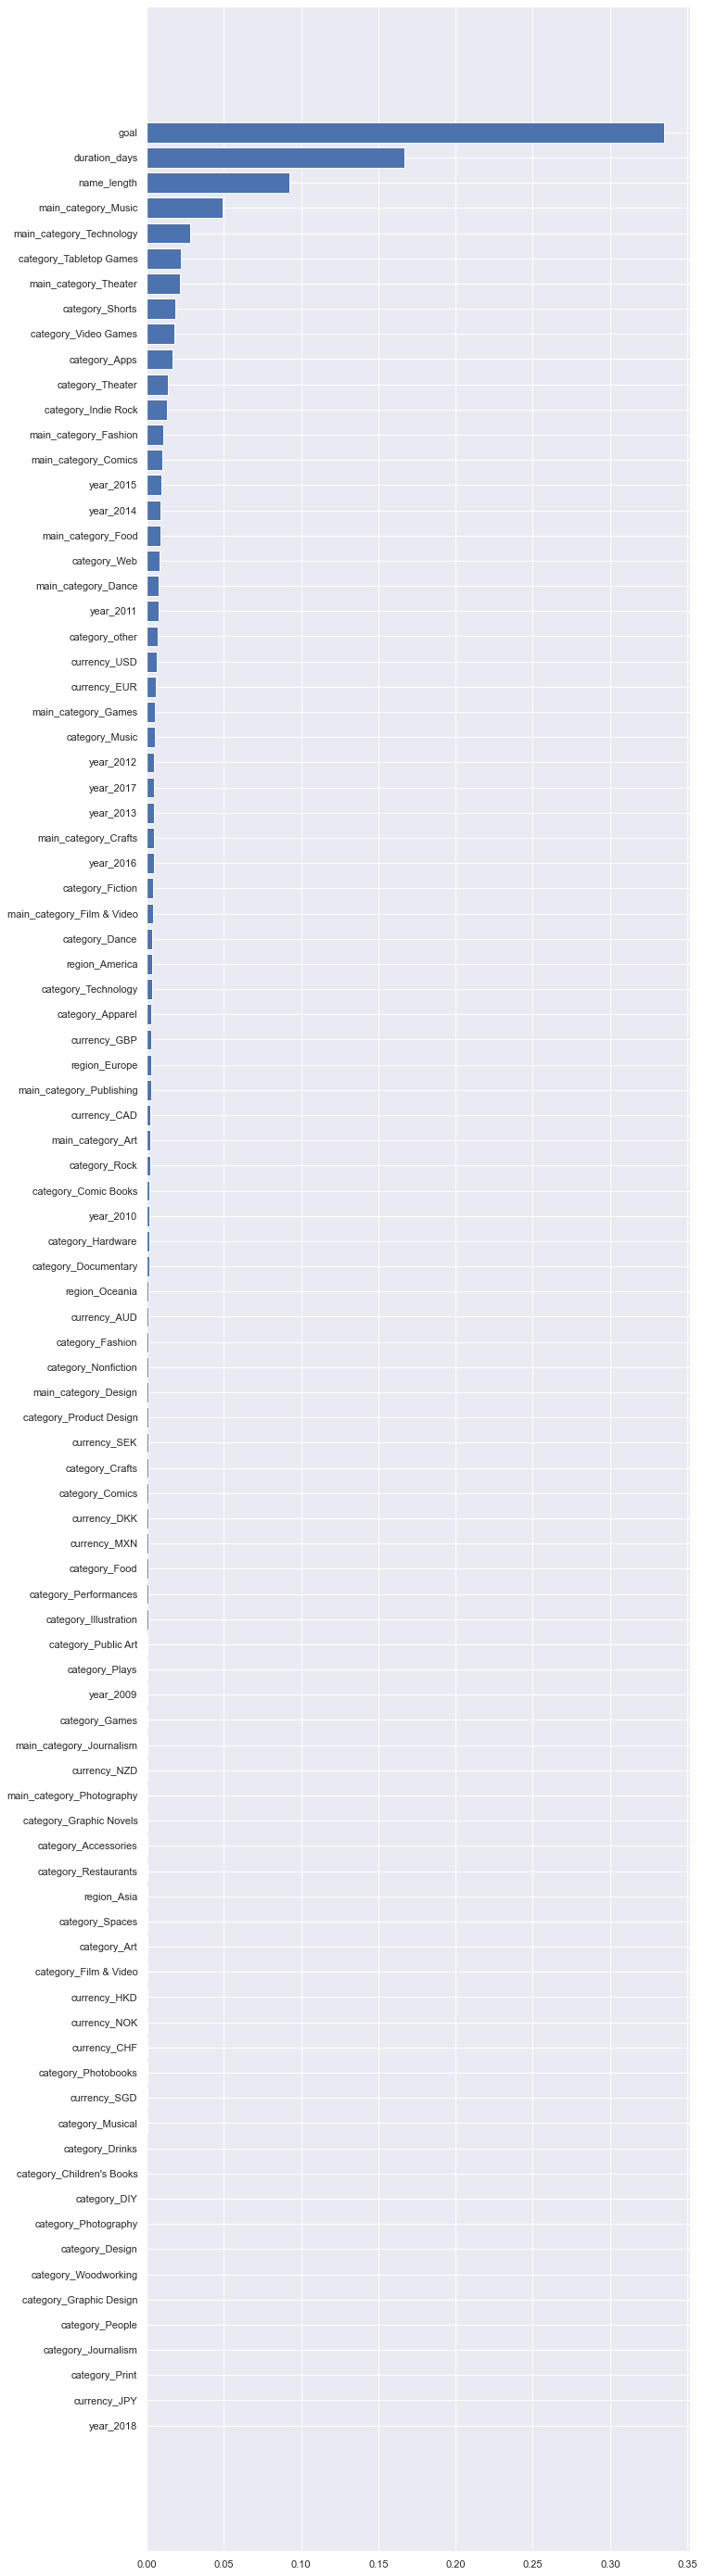

In [92]:
sorted_idx = forest.feature_importances_.argsort()
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 50.5)
plt.barh(X.columns[sorted_idx], forest.feature_importances_[sorted_idx])

In [93]:
print ('goal, duration_days')

goal, duration_days


# Section 5. Build the stronger model

In [94]:
# Q5.1 Generate two (or more) meaningfull features.

In [95]:
df['launched'] = df1['launched']
df['season_launched'] = (df['launched'].dt.month%12+3)//3
df.drop('launched', axis=1, inplace=True)

In [96]:
df['usd_goal_real'] = df1['usd_goal_real']
t1 = df['usd_goal_real'].mean()
t2 = df['duration_days'].mean()
df['high_goal_short_time'] = np.where((df['usd_goal_real'] > t1) & (df['duration_days'] < t2), 1, 0)

In [97]:
# Q5.2 Train an xgboost, that's beat random forest.

In [98]:
num_features = ['goal', 'duration_days', 'name_length']

X = df.drop('state',axis=1)
y = df['state']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

<ipython-input-98-5108e63f746b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_features] = scaler.transform(X_train[num_features])
C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-98-5108e63f746b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [99]:
from xgboost import XGBClassifier
boost = XGBClassifier()
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)

from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_pred), 3)

0.68

In [100]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [101]:
gridx = GridSearchCV(boost, params, cv=5, verbose=50)
gridx.fit(X_train,y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.677, total=   9.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.680, total=   9.7s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.9s remaining:    0.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.678, total=   9.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.3s remaining:    0.0s
[CV] colsample_

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.681, total=   7.7s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.2min remaining:    0.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.677, total=   9.1s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:  4.4min remaining:    0.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.681, total=   9.2s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  4.5min remaining:    0.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.677, total=   9.1s
[Parallel(n_jobs=1)]: Done  33 out of  3

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.680, total=  11.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.680, total=  11.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.682, total=  10.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.680, total=  10.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.681, total=  10.5s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.680, total=  11.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.684, total=  11.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.679, total=  14.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.683, total=  12.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.680, total=  12.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.678, total=   7.7s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.680, total=   7.8s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.677, total=   7.6s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.675, total=   7.8s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.682, total=   7.8s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.679, total=  10.6s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.678, total=  10.5s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.683, total=  10.5s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0, score=0.680, total=   9.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0, score=0.682, total=   9.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, score=0.682, total=  13.4s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=0.680, total=  12.7s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=0.683, total=  12.7s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=0.681, total=  12.7s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=0.680, total=  12.8s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.680, total=   9.6s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.677, total=  10.4s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.677, total=   9.8s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.681, total=   9.6s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.677, total=   9.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.8 


[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.677, total=   8.0s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.675, total=   8.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.681, total=   8.0s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.679, total=  11.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.682, total=  11.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.678, total=  10.8s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.683, total=  10.9s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.680, total=   9.8s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.681, total=   9.7s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.680, total=   9.8s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsa

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=0.683, total=  13.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.681, total=  12.7s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.684, total=  12.8s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.679, total=  12.7s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.680, total=  12.7s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsa

[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.681, total=  10.0s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.678, total=   9.9s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.676, total=   9.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.681, total=   9.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, score=0.678, total=   9.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  cols

[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=0.678, total=   9.8s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0, score=0.683, total=   9.8s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6, score=0.679, total=  11.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6, score=0.683, total=  11.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6, score=0.680, total=  11.4s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsamp

[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, score=0.681, total=  11.7s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, score=0.681, total=  11.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, score=0.680, total=  11.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, score=0.680, total=  11.5s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, score=0.684, total=  11.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_byt

[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.677, total=   9.3s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.677, total=   9.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.681, total=   9.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.678, total=   8.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.680, total=   8.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.681, total=  11.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.679, total=  10.9s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.682, total=  11.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.679, total=  10.9s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.678, total=  10.9s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.683, total=  13.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.680, total=  13.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.678, total=  13.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.683, total=  13.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.682, total=  12.7s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.675, total=   9.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.680, total=   9.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.679, total=  11.0s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.681, total=  11.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.678, total=  11.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6 


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.683, total=  12.8s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.681, total=  11.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.681, total=  12.0s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.679, total=  11.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.679, total=  11.6s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0 


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.681, total=  15.0s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.683, total=  15.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.679, total=  15.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.680, total=  15.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.684, total=  15.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 


[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6, score=0.680, total=  11.0s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6, score=0.677, total=  11.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6, score=0.676, total=  11.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6, score=0.682, total=  11.0s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.678, total=  10.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0, score=0.676, total=   9.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0, score=0.682, total=   9.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.680, total=  13.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.683, total=  13.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.679, total=  13.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_b

[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.680, total=  11.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.683, total=  11.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.679, total=  11.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.679, total=  11.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.682, total=  11.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsa

[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, score=0.679, total=  15.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, score=0.680, total=  15.0s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, score=0.683, total=  15.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.681, total=  14.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.683, total=  14.0s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  cols

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.681, total=  11.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.677, total=  10.9s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.680, total=  10.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.678, total=  10.6s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.675, total=  10.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsa

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.679, total=  13.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.682, total=  13.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.679, total=  13.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.679, total=  13.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.683, total=  13.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=10, subsa

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.683, total=  13.9s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.679, total=  13.9s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.680, total=  14.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.683, total=  13.9s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=0.680, total=  16.3s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.

[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8, score=0.676, total=  10.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8, score=0.682, total=  10.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.678, total=   9.8s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.680, total=   9.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.678, total=   9.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.679, total=  12.8s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.682, total=  12.8s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.679, total=  12.7s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.678, total=  12.8s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.683, total=  12.8s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.678, total=  15.9s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.680, total=  15.9s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.683, total=  15.9s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.681, total=  15.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.682, total=  15.9s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.681, total=   9.4s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.677, total=  11.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.680, total=  11.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.678, total=  11.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.676, total=  11.0s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.681, total=  11.6s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.679, total=  11.7s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.679, total=  11.6s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.682, total=  11.9s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.680, total=  13.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.679, total=  15.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.685, total=  15.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.681, total=  14.0s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.683, total=  13.9s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.680, total=  13.9s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.678, total=  12.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.680, total=  12.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.678, total=  12.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.676, total=  12.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.682, total=  12.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 


[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.684, total=  15.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.680, total=  15.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.680, total=  15.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.683, total=  15.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.681, total=  14.8s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8 


[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.679, total=  13.7s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.678, total=  13.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.682, total=  13.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.681, total=  18.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.682, total=  18.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=1, subsample=

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.683, total=  17.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.684, total=  17.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.682, total=  16.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.684, total=  16.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.681, total=  16.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsa

[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=0.677, total=  12.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=0.680, total=  11.9s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=0.678, total=  12.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=0.675, total=  12.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8, score=0.682, total=  12.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  cols

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=0.680, total=  15.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=0.680, total=  15.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=0.683, total=  15.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.680, total=  14.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.682, total=  14.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  cols

[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=0.683, total=  16.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.681, total=  18.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.683, total=  18.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.680, total=  18.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.680, total=  18.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsa

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.681, total=  10.9s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.678, total=  10.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.676, total=  10.9s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.682, total=  10.9s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.678, total=  12.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.679, total=  14.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.678, total=  14.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.683, total=  14.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.680, total=  13.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.682, total=  13.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=5, subsample=1.0 


[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.681, total=  18.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.683, total=  18.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.679, total=  18.0s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.684, total=  17.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.680, total=  17.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8 


[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6, score=0.677, total=  12.8s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6, score=0.680, total=  12.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6, score=0.677, total=  12.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6, score=0.676, total=  12.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6, score=0.682, total=  12.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0, score=0.679, total=  13.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0, score=0.678, total=  13.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0, score=0.683, total=  13.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.680, total=  15.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.683, total=  15.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.684, total=  18.0s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.682, total=  16.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.682, total=  16.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.680, total=  16.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.680, total=  16.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.681, total=  12.0s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.678, total=  12.1s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.675, total=  12.0s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.682, total=  12.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.677, total=  10.9s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.681, total=  15.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.683, total=  15.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.680, total=  14.8s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.682, total=  14.8s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.679, total=  14.8s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.682, total=  18.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.682, total=  18.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.680, total=  18.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.680, total=  18.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.684, total=  18.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.679, total=  16.4s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.681, total=  16.4s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.683, total=  16.3s
[Parallel(n_jobs=1)]: Done 2025 out of 2025 | elapsed: 429.0min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [102]:
gridx.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 10,
 'subsample': 0.8}

In [104]:
boost = XGBClassifier(colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8)
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)
round (accuracy_score(y_test, y_pred), 3)

0.68